In [2]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import scipy.stats as stats
import aesara.tensor as at

In [3]:
az.style.use('arviz-darkgrid')

# Gaussian Mixture model

In [4]:
n = 20

mu1 = np.ones(n) * (1. / 2)
mu2 = -mu1

stdev = 0.1
sigma = np.power(stdev, 2) * np.eye(n)
isigma = np.linalg.inv(sigma)
logdsigma = np.linalg.slogdet(sigma)[1]

w1 = 0.1
w2 = (1 - w1)

In [5]:
def two_gaussians(x):
    log_like1 = - 0.5 * n * at.log(2 * np.pi) \
                - 0.5 * logdsigma \
                - 0.5 * (x - mu1).T.dot(isigma).dot(x - mu1)
    log_like2 = - 0.5 * n * at.log(2 * np.pi) \
                - 0.5 * logdsigma \
                - 0.5 * (x - mu2).T.dot(isigma).dot(x - mu2)
    return pm.math.logsumexp([at.log(w1) + log_like1, at.log(w2) + log_like2])

In [6]:
with pm.Model() as model:
    X = pm.Uniform('X',
                   shape=n,
                   lower=-2. * np.ones_like(mu1),
                   upper=2. * np.ones_like(mu1),
                   testval=-1. * np.ones_like(mu1))
    llk = pm.Potential('llk', two_gaussians(X))

In [7]:
with model:
    idata_nuts = pm.sample(5000, cores=1)

Sequential sampling (2 chains in 1 job)
NUTS: [X]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 15 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


In [12]:
idata_nuts.posterior.indexes

chain: Int64Index([0, 1], dtype='int64', name='chain')
draw: Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
                  ...
                  4990, 4991, 4992, 4993, 4994, 4995, 4996, 4997, 4998, 4999],
                 dtype='int64', name='draw', length=5000)
X_dim_0: Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
                     19],
                    dtype='int64', name='X_dim_0')

In [7]:
with model:
    idata_smc = pm.sample_smc(5000, cores=1, progressbar=True) 

Initializing SMC sampler...
Sampling 2 chains in 1 job


0
0.00296783447265625
0.006291218880505767
0.010338239926775034
0.015476641002403594
0.022246431704397922
0.031065988594265924
0.04270410829440471
0.05783868613134639
0.07807200273662934
0.10542610337517012
0.1433834936075371
0.19330045961497608
0.2618897610138704
0.3534948752328964
0.4765506323909358
0.641643671465026
0.8586954822624235
Resample (0.0015414423412746852, 0.00023798165825271501)
Mutate (1.4474871158599854, 0.5094843337332602)
Update (0.0026805665757921007, 0.0006029042285165553)
Stages 18
Total time 27.107779026031494
0
0.0031480789184570312
0.006673024087831436
0.011041487022941684
0.016716768424411253
0.023824673225075258
0.032493960432835735
0.044082359652698494
0.05991509750981891
0.08128871353151555
0.11031706803184366
0.1481764688142257
0.20019684114261027
0.27168255315594314
0.36638451774970854
0.4940605812886183
0.6617139931373464
0.8927937730088336


We recommend running at least 4 chains for robust computation of convergence diagnostics


Resample (0.0017194218105740016, 0.0003405932935556812)
Mutate (1.8163535197575886, 0.9347480924263644)
Update (0.002934137980143229, 0.0006622074639657575)
Stages 18
Total time 33.68383193016052


In [8]:
with model:
    idata_smc_hmc_1 = pm.sample_smc(500, kernel=pm.smc.HMC, 
                                            n_steps=2,
                                            path_length=50,
                                            max_steps=3,
                                            vars=None,
                                            cores=1,
                                            chains=2)

Initializing SMC sampler...
Sampling 2 chains in 1 job


0
0.00313568115234375
0.006837753520812839
0.01118684716776297
0.016512724675118585
0.02285337079603782
0.030878288449972358
0.04283676075827483
0.05782845915456612
0.07726914108197404
0.10543414389815604
0.14035595106018955
0.18757347574030195
0.253946517400203
0.3387767525167458
0.4450366379758798
0.5801848208080544
0.7743001773382033
Resample (0.0005745490392049154, 0.00010895196479424232)
Mutate (0.8862000041537814, 0.14040195538608946)
Update (2.750242922041151, 0.598961910410535)
Compile (2.634407595584267, 0.7561907771607194)
One particle iteration (0.0017344401412540012, 0.0008730795587092462)
Stages 18
Total time 78.13763499259949
0
0.0030517578125
0.006601630710065365
0.010936031155985404
0.015959073252599244
0.02257395579798356
0.031022431328631823
0.0418984365755043
0.05522413996428796
0.07172339805419055
0.09279038485523425
0.12282334876559495
0.1604035453967525
0.2093576502677862
0.27996036986782336
0.37822435264392923
0.4962148660502059
0.6493101787594501
0.8484841660712

We recommend running at least 4 chains for robust computation of convergence diagnostics


Resample (0.0005747770008287931, 0.00018562329272266696)
Mutate (0.7732704062210886, 0.08697937347276143)
Update (2.4521294769487882, 0.6827762814912357)
Compile (2.36740163564682, 0.7557564908174894)
One particle iteration (0.0015114955651132683, 0.0007487046829666152)
Stages 19
Total time 75.92629599571228


In [10]:
with model:
    idata_smc_hmc_1 = pm.sample_smc(5000, kernel=pm.smc.HMC, 
                                            n_steps=2,
                                            path_length=50,
                                            max_steps=3,
                                            vars=None,
                                            cores=1,
                                            chains=2)

Initializing SMC sampler...
Sampling 2 chains in 1 job


0
0.0031251907348632812
0.006621610784350196
0.010775369577643381
0.0157751039922
0.02212567729447106
0.030140344802764014
0.04041255453731686
0.05327743030651729
0.07102594616637836
0.0939475242978318
0.1243258173103885
0.16582556653066338
0.22174415353737317
0.29459902639736085
0.39108991400293014
0.5167369144322058
0.6863018411453699
0.9013493546981115
Resample (0.002303161119159899, 0.0004653149493720789)
Mutate (7.410747339850978, 0.8120594546662198)
Update (2.6676719439657113, 0.8374366527448984)
Compile (2.5524932622909544, 0.9403069809273521)
One particle iteration (0.001447757981952868, 0.0006225478579353899)
Stages 19
Total time 309.25711607933044
0
0.0031347274780273438
0.006602565442335617
0.010732600772704161
0.015875674731392134
0.02203670531293757
0.030140390991396378
0.04066809069927088
0.054132966624736524
0.07179945351527428
0.09510168179920836
0.12781596184582378
0.17078112287768232
0.22699521617791954
0.30060889441247585
0.40046782916005824
0.5313377556133629
0.7056

We recommend running at least 4 chains for robust computation of convergence diagnostics


Resample (0.002635303296540913, 0.0008723625254989376)
Mutate (7.449921532681114, 0.7195403868630844)
Update (2.644515589663857, 0.7657737693269433)
Compile (2.529867696762085, 0.8780098589714677)
One particle iteration (0.0014575239959516023, 0.0038663206454559954)
Stages 19
Total time 304.43116211891174


In [10]:
def results(idata):
    ax = az.plot_trace(idata, compact=True, kind="rank_vlines")
    ax[0, 0].axvline(-0.5, 0, .9, color="k")
    ax[0, 0].axvline(0.5, 0, 0.1, color="k")
    ax[0, 0].set_xlim(-1, 1)
    np.mean(idata.posterior["X"] > 0).item()

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'X'}, xlabel='Rank (all chains)'>]],
      dtype=object)

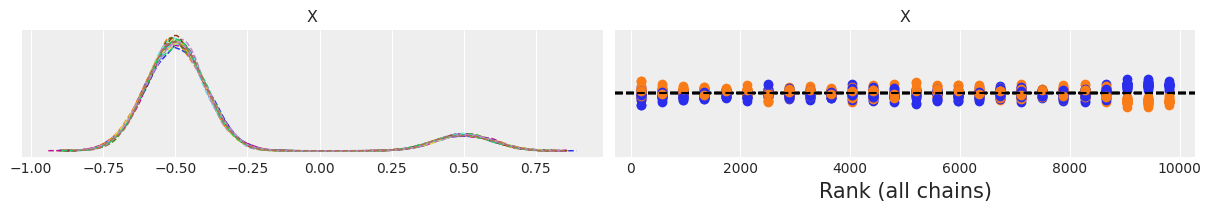

In [12]:
az.plot_trace(idata_smc_hmc_1, combined=True, kind="rank_vlines")

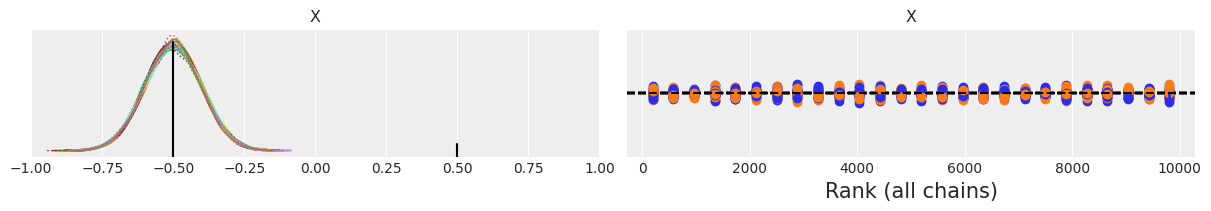

In [11]:
results(idata_nuts)

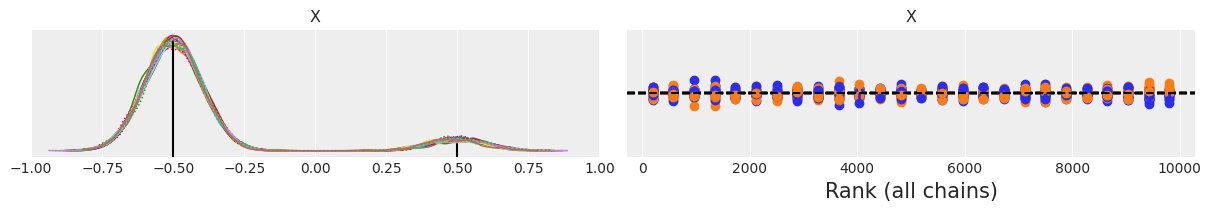

In [14]:
results(idata_smc)

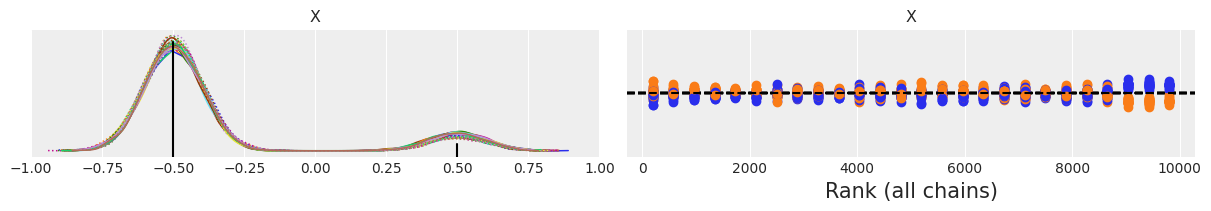

In [15]:
results(idata_smc_hmc_1)

# Compute error score

In [16]:
def compute_error_score(idata):
    # Wang bimodality index True Value
    BI = abs(mu1 - mu2) * (w1*(1-w1))**0.5
    posterior = idata.posterior
    error_score_list = []

    for chain in posterior["chain"]:
        for dimension in posterior["X_dim_0"]:
            v = np.ravel(posterior.isel(chain=chain, X_dim_0=dimension)["X"])
            above_zero = v > 0
            below_zero = v < 0
            w1_ = np.mean(below_zero)
            if np.any(above_zero) and np.any(below_zero):
                BI_ = abs(v[below_zero].mean() - v[above_zero].mean()) * (w1_*(1-w1_))**0.5
            else:
                BI_ = 0
            error_score = (np.mean(((v-mu1[0]) * w1 + (v-mu2[0]) * w2))**2)**0.5 + abs(BI - BI_)
            error_score_list.append(error_score)

    np.mean(error_score_list), np.std(error_score_list)

In [ ]:
compute_error_score(idata_nuts)


In [ ]:
compute_error_score(idata_smc)


In [ ]:
compute_error_score(idata_smc_hmc_1)

# Hierarchical Model

For this model we may use NUTS as a "gold-standard"

In [13]:
data = pd.read_csv('radon.csv')

county_names = data.county.unique()
county_idx = data['county_code'].values.astype(np.int32)
n_counties = len(data.county.unique())

In [14]:
with pm.Model() as hierarchical_model_non_centered:
    mu_a = pm.Normal('mu_a', mu=0., sd=5)
    sigma_a = pm.HalfNormal('sigma_a', 5)
    mu_b = pm.Normal('mu_b', mu=0., sd=5)
    sigma_b = pm.HalfNormal('sigma_b', 5)
     
    a_offset = pm.Normal('a_offset', mu=0, sd=2, shape=n_counties)
    a = pm.Deterministic("a", mu_a + a_offset * sigma_a)
    b_offset = pm.Normal('b_offset', mu=0, sd=2, shape=n_counties)
    b = pm.Deterministic("b", mu_b + b_offset * sigma_b)
 
    eps = pm.HalfNormal('eps', 5)
    
    radon_est = a[county_idx] + b[county_idx] * data.floor.values
    
    radon_like = pm.Normal('radon_like', mu=radon_est, sd=eps, observed=data.log_radon)

In [16]:
with hierarchical_model_non_centered:
    idata_nuts_hierarchical = pm.sample(10)

Only 10 samples in chain.
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_a, sigma_a, mu_b, sigma_b, a_offset, b_offset, eps]


Sampling 4 chains for 1_000 tune and 10 draw iterations (4_000 + 40 draws total) took 41 seconds.


In [17]:
idata_nuts_hierarchical

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [20]:
with hierarchical_model_non_centered:
    idata_smc_hierarchical = pm.sample_smc(5000, cores=1)

Initializing SMC sampler...
Sampling 2 chains in 1 job


0
0.0003871917724609375
0.0018574728728708578
0.003906921160763416
0.0061322560999219206
0.008618467948323324
0.011601050704448924
0.01563729334549314
0.02177446247551382
0.0316261983124516
0.048753657425188474
0.07808070893025729
0.12340429084475142
0.18459638420511465
0.2501920226664533
0.31803659771535076
0.39179701669371503
0.47297278983789826
0.5593946636552083
0.6554555358449473
0.7575027185339613
0.8649623528013792
0.9783691294410364
Resample (0.003108470336250637, 0.0005777179788434252)
Mutate (1.9699370239091956, 0.22492501880605867)
Update (0.00310082020966903, 0.0006970419155431039)
Stages 23
Total time 52.062670946121216
0
0.00038814544677734375
0.0018631932921380212
0.003974566794709424
0.006214103005881552
0.008656480081733892
0.011602923135125526
0.015537710822898863
0.021542710788145958
0.03142201602335376
0.04841608026949004
0.07846289690474523
0.124715716425814
0.18516398987934285
0.2532314171388121
0.32631551525595953
0.4021134820333081
0.48645017431917825
0.57785993

We recommend running at least 4 chains for robust computation of convergence diagnostics


In [21]:
with hierarchical_model_non_centered:
    idata_smc_hmc_hierarchical = pm.sample_smc(5000, kernel=pm.smc.HMC,
                                       n_steps=2,
                                       path_length=10,
                                       max_steps=2,
                                       vars=None,
                                       cores=1,
                                       progressbar=True)

Initializing SMC sampler...
Sampling 2 chains in 1 job


0
0.00038909912109375
0.001867960218078224
0.0036563350419682745
0.005644918566718663
0.008056610464356413
0.010981145117247692
0.014826113168058827
0.021177830535537352
0.030470166391443846
0.047337210750464875
0.08221257383055186
0.1558970943855853
0.2994048583417852
0.5020148263909084
0.7299949307850901
0.9485095969299162
Resample (0.004200486575855929, 0.001757989823248473)
Mutate (9.614964106503654, 1.191085939201978)
Update (3.222572074216955, 0.5579598586135786)
Compile (3.0981557766596475, 0.7213887937181805)
One particle iteration (0.0018584780917448155, 0.0010941610204890445)
Stages 17
Total time 422.33685994148254
0
0.00036525726318359375
0.0018107634878106182
0.0036163400998972
0.005566885467679464
0.007877863626779778
0.011128482537888347
0.016264842772422995
0.02388137962144321
0.03689247557928848
0.0610134523560185
0.0915024299766716
0.1220507385544681
0.16918859461949953
0.22659700279297562
0.3475010035180883
0.531621909162481
0.7446998456228204
Resample (0.003882103496

We recommend running at least 4 chains for robust computation of convergence diagnostics


In [25]:
with hierarchical_model_non_centered:
    idata_smc_hmc_hierarchical_5 = pm.sample_smc(5000, kernel=pm.smc.HMC,
                                       n_steps=2,
                                       path_length=200,
                                       max_steps=2,
                                       vars=None,
                                       cores=1,
                                       progressbar=True)

Initializing SMC sampler...
Sampling 2 chains in 1 job


0
0.00039958953857421875
0.001805978110041906
0.0035038911592667143
0.005549746747177717
0.007987231487953293
0.010926115987396475
0.016044029556909804
0.022596191274939233
0.03546488519005822
0.05451490449947165
0.08473499463648854
0.13313097316557143
0.19488896953668108
0.2488886059994395
0.29869438661493397
0.3918902965278427
0.6583708778832447
Resample (0.004703177346123589, 0.0024861365711314394)
Mutate (9.469754483964708, 0.8883923803018127)
Update (3.6489642328686185, 0.6730481269748358)
Compile (3.500549504631444, 0.8830620938902134)
One particle iteration (0.001828880121972826, 0.0006771107765278977)
Stages 18
Total time 451.20138812065125
0
0.000385284423828125
0.001858427398474305
0.0037230338063938004
0.005700128103223082
0.008141232883019218
0.011260350711012689
0.01611187890055854
0.02485284104300641
0.03763150308215688
0.05270050250345058
0.07503014685722037
0.10961651163498565
0.18392113605558313
0.29670557478015863
0.46054786079984067
0.7649805348115909
Resample (0.005

We recommend running at least 4 chains for robust computation of convergence diagnostics


In [29]:
with hierarchical_model_non_centered:
    idata_smc_hmc_hierarchical_6 = pm.sample_smc(5000, kernel=pm.smc.HMC,
                                       n_steps=2,
                                       path_length=1000,
                                       max_steps=2,
                                       vars=None,
                                       cores=1,
                                       progressbar=True)

Initializing SMC sampler...
Sampling 2 chains in 1 job


0
0.0003681182861328125
0.0018012269583778107
0.0036554057743811317
0.0056592211253165565
0.007836004707452781
0.010779862006023225
0.015336619715012875
0.020689238923774035
0.0273110022960574
0.04024684056453991
0.05991584142847232
0.09188744316274432
0.13758420002852909
0.21294929252005043
0.3346746703000567
0.48586921546171835
0.6838225931766231
Resample (0.004830784267849392, 0.0027507757927979657)
Mutate (9.527283297644722, 0.36340833191542066)
Update (3.74990631474389, 1.071832654336846)
Compile (3.5961528828269556, 1.2099764789748932)
One particle iteration (0.0018426550732718574, 0.0005542072089070386)
Stages 18
Total time 427.2235436439514
0
0.00040340423583984375
0.0019203940314582724
0.003598201928125086
0.0052841205379279485
0.0075802078663721635
0.011726268797039637
0.018097385184256153
0.02412488098679923
0.03293229247272652
0.041692941385301635
0.06414880922204702
0.11601884540072874
0.2204001865315569
0.34976440637048
0.4580913339186092
0.5913284673417494
0.752366173681

We recommend running at least 4 chains for robust computation of convergence diagnostics


In [32]:
with hierarchical_model_non_centered:
    idata_smc_hmc_hierarchical_7 = pm.sample_smc(5000, kernel=pm.smc.HMC,
                                       n_steps=2,
                                       path_length=5000,
                                       max_steps=2,
                                       vars=None,
                                       cores=1,
                                       progressbar=True)

Initializing SMC sampler...
Sampling 2 chains in 1 job


0
0.00038433074951171875
0.0017993114724959014
0.003420052063156609
0.005134682421964293
0.007188379159564131
0.010833525232688023
0.016907773596378337
0.025872175941228082
0.0371155110597879
0.05038391054404867
0.06723659478899491
0.10460248886862052
0.23850889872790837
0.4151794463454235
0.6956957796949275
Resample (0.004790320992469788, 0.0021130490872764405)
Mutate (9.704897671937943, 0.6233883087038241)
Update (3.692745581269264, 1.074237163610002)
Compile (3.622470589245067, 1.0703108593785586)
One particle iteration (0.001876410311460495, 0.005058285871623559)
Stages 16
Total time 415.1021809577942
0
0.00038433074951171875
0.0017792881603782007
0.003310479358692044
0.005041389444620913
0.007141794475875814
0.010627380593554689
0.016865418821216196
0.027119855027224506
0.04261576650526309
0.07859094517415363
0.1304258330057591
0.20098845052987185
0.2882268951132469
0.37015097261991964
0.43026060853266457
0.5418065732858289
0.8143278301583137
Resample (0.004793498251173232, 0.0038

We recommend running at least 4 chains for robust computation of convergence diagnostics


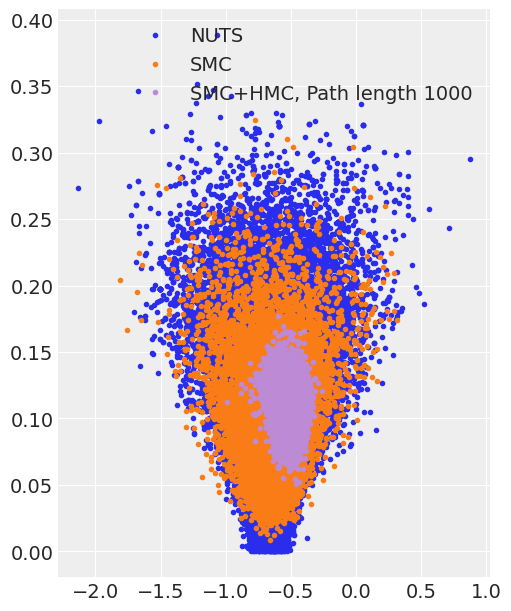

In [37]:
nuts_posterior = idata_nuts_hierarchical.posterior.stack(samples=("chain", "draw"))
smc_posterior = idata_smc_hierarchical.posterior.stack(samples=("chain", "draw"))
smc_hmc_posterior = idata_smc_hmc_hierarchical.posterior.stack(samples=("chain", "draw"))
smc_hmc_posterior_5 = idata_smc_hmc_hierarchical_5.posterior.stack(samples=("chain", "draw"))
smc_hmc_posterior_6 = idata_smc_hmc_hierarchical_6.posterior.stack(samples=("chain", "draw"))
smc_hmc_posterior_7 = idata_smc_hmc_hierarchical_7.posterior.stack(samples=("chain", "draw"))

plt.figure(figsize=(5,6))
plt.plot(nuts_posterior["b"].isel(b_dim_0=75), nuts_posterior["sigma_b"], '.C0', label="NUTS")
plt.plot(smc_posterior["b"].isel(b_dim_0=75), smc_posterior["sigma_b"], '.C1', label="SMC")
plt.plot(smc_hmc_posterior_7["b"].isel(b_dim_0=75), smc_hmc_posterior_6["sigma_b"], '.C8', label="SMC+HMC, Path length 1000")
plt.legend()



In [ ]:
plt.figure(figsize=(10,12))
plt.plot(nuts_posterior["b"].isel(b_dim_0=75), nuts_posterior["mu_b"], '.C0', label="NUTS")
plt.plot(smc_posterior["b"].isel(b_dim_0=75), smc_posterior["mu_b"], '.C1', label="SMC")
#plt.plot(smc_hmc_posterior["b"].isel(b_dim_0=75), smc_hmc_posterior["sigma_b"], '.C2', label="SMC+HMC, Path length 10")
#plt.plot(smc_hmc_posterior_5["b"].isel(b_dim_0=75), smc_hmc_posterior_5["sigma_b"], '.C6', label="SMC+HMC, Path length 200")
#plt.plot(smc_hmc_posterior_6["b"].isel(b_dim_0=75), smc_hmc_posterior_6["sigma_b"], '.C7', label="SMC+HMC, Path length 1000")
plt.plot(smc_hmc_posterior_7["b"].isel(b_dim_0=75), smc_hmc_posterior_6["mu_b"], '.C8', label="SMC+HMC, Path length 1000")

plt.legend()


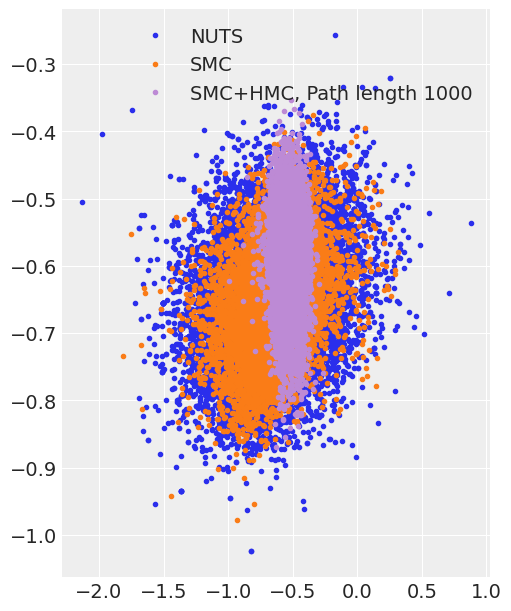

In [38]:
plt.figure(figsize=(5,6))
plt.plot(nuts_posterior["b"].isel(b_dim_0=75), nuts_posterior["mu_b"], '.C0', label="NUTS")
plt.plot(smc_posterior["b"].isel(b_dim_0=75), smc_posterior["mu_b"], '.C1', label="SMC")
plt.plot(smc_hmc_posterior_7["b"].isel(b_dim_0=75), smc_hmc_posterior_6["mu_b"], '.C8', label="SMC+HMC, Path length 1000")

plt.legend()

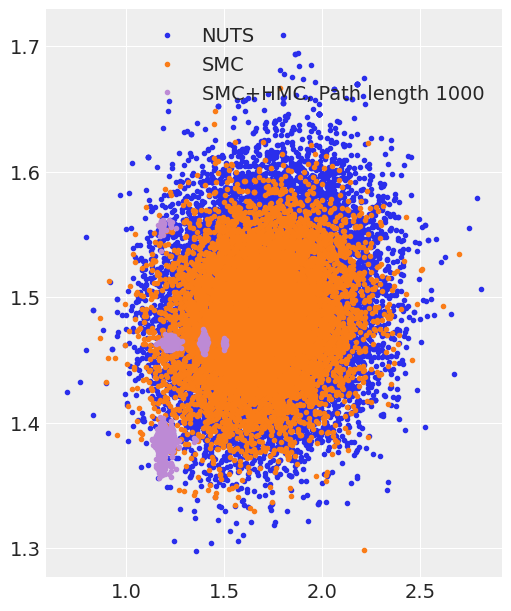

In [40]:
plt.figure(figsize=(5,6))
plt.plot(nuts_posterior["a"].isel(a_dim_0=75), nuts_posterior["mu_a"], '.C0', label="NUTS")
plt.plot(smc_posterior["a"].isel(a_dim_0=75), smc_posterior["mu_a"], '.C1', label="SMC")
plt.plot(smc_hmc_posterior_7["a"].isel(a_dim_0=75), smc_hmc_posterior_6["mu_a"], '.C8', label="SMC+HMC, Path length 1000")

plt.legend()

array([[<AxesSubplot:title={'center':'mu_a'}>,
        <AxesSubplot:title={'center':'mu_a'}, xlabel='Rank (all chains)'>],
       [<AxesSubplot:title={'center':'mu_b'}>,
        <AxesSubplot:title={'center':'mu_b'}, xlabel='Rank (all chains)'>],
       [<AxesSubplot:title={'center':'a_offset'}>,
        <AxesSubplot:title={'center':'a_offset'}, xlabel='Rank (all chains)'>],
       [<AxesSubplot:title={'center':'b_offset'}>,
        <AxesSubplot:title={'center':'b_offset'}, xlabel='Rank (all chains)'>],
       [<AxesSubplot:title={'center':'sigma_a'}>,
        <AxesSubplot:title={'center':'sigma_a'}, xlabel='Rank (all chains)'>],
       [<AxesSubplot:title={'center':'sigma_b'}>,
        <AxesSubplot:title={'center':'sigma_b'}, xlabel='Rank (all chains)'>],
       [<AxesSubplot:title={'center':'eps'}>,
        <AxesSubplot:title={'center':'eps'}, xlabel='Rank (all chains)'>],
       [<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'a'}, xlabel='Rank (all chains)'

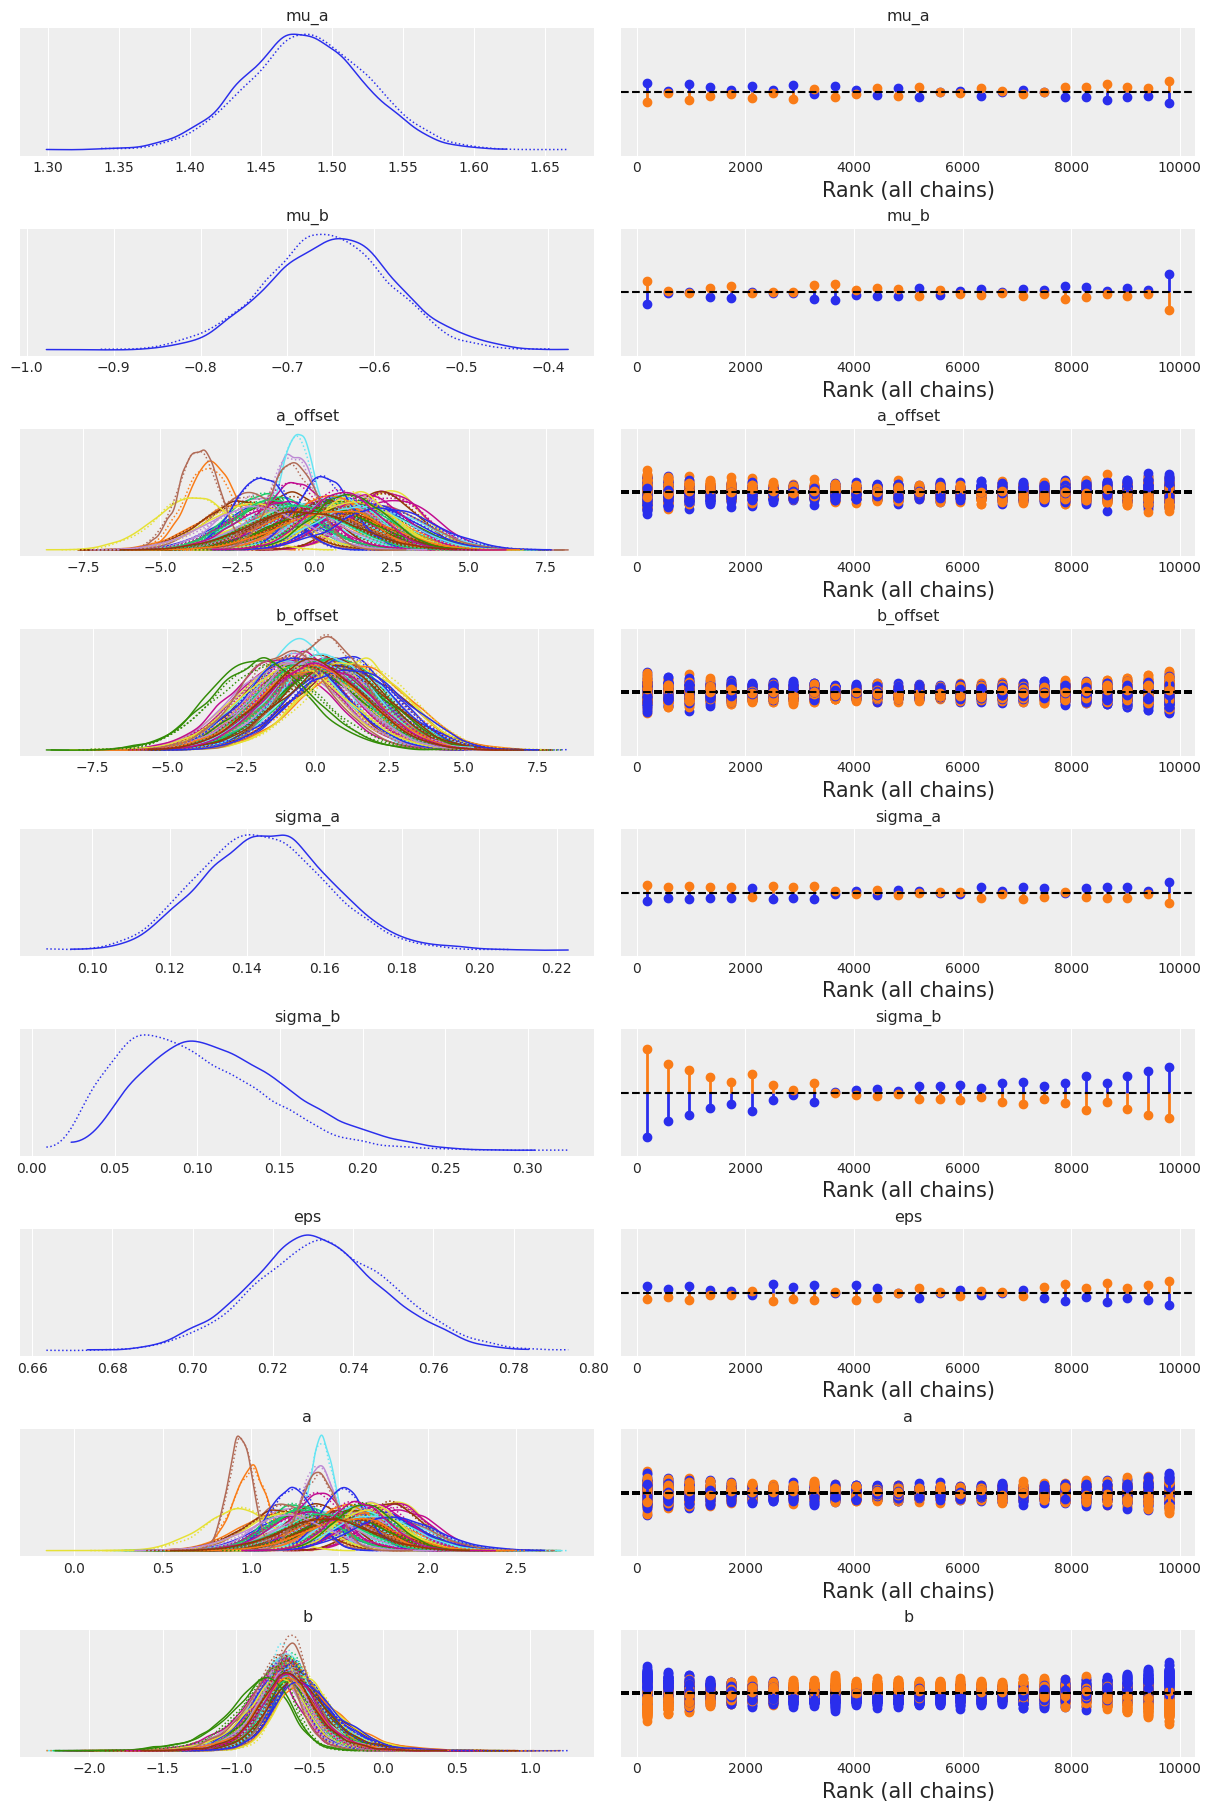

In [42]:
    az.plot_trace(idata_smc_hierarchical, compact=True, kind="rank_vlines")


array([[<AxesSubplot:title={'center':'mu_a'}>,
        <AxesSubplot:title={'center':'mu_a'}, xlabel='Rank (all chains)'>],
       [<AxesSubplot:title={'center':'mu_b'}>,
        <AxesSubplot:title={'center':'mu_b'}, xlabel='Rank (all chains)'>],
       [<AxesSubplot:title={'center':'a_offset'}>,
        <AxesSubplot:title={'center':'a_offset'}, xlabel='Rank (all chains)'>],
       [<AxesSubplot:title={'center':'b_offset'}>,
        <AxesSubplot:title={'center':'b_offset'}, xlabel='Rank (all chains)'>],
       [<AxesSubplot:title={'center':'sigma_a'}>,
        <AxesSubplot:title={'center':'sigma_a'}, xlabel='Rank (all chains)'>],
       [<AxesSubplot:title={'center':'sigma_b'}>,
        <AxesSubplot:title={'center':'sigma_b'}, xlabel='Rank (all chains)'>],
       [<AxesSubplot:title={'center':'eps'}>,
        <AxesSubplot:title={'center':'eps'}, xlabel='Rank (all chains)'>],
       [<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'a'}, xlabel='Rank (all chains)'

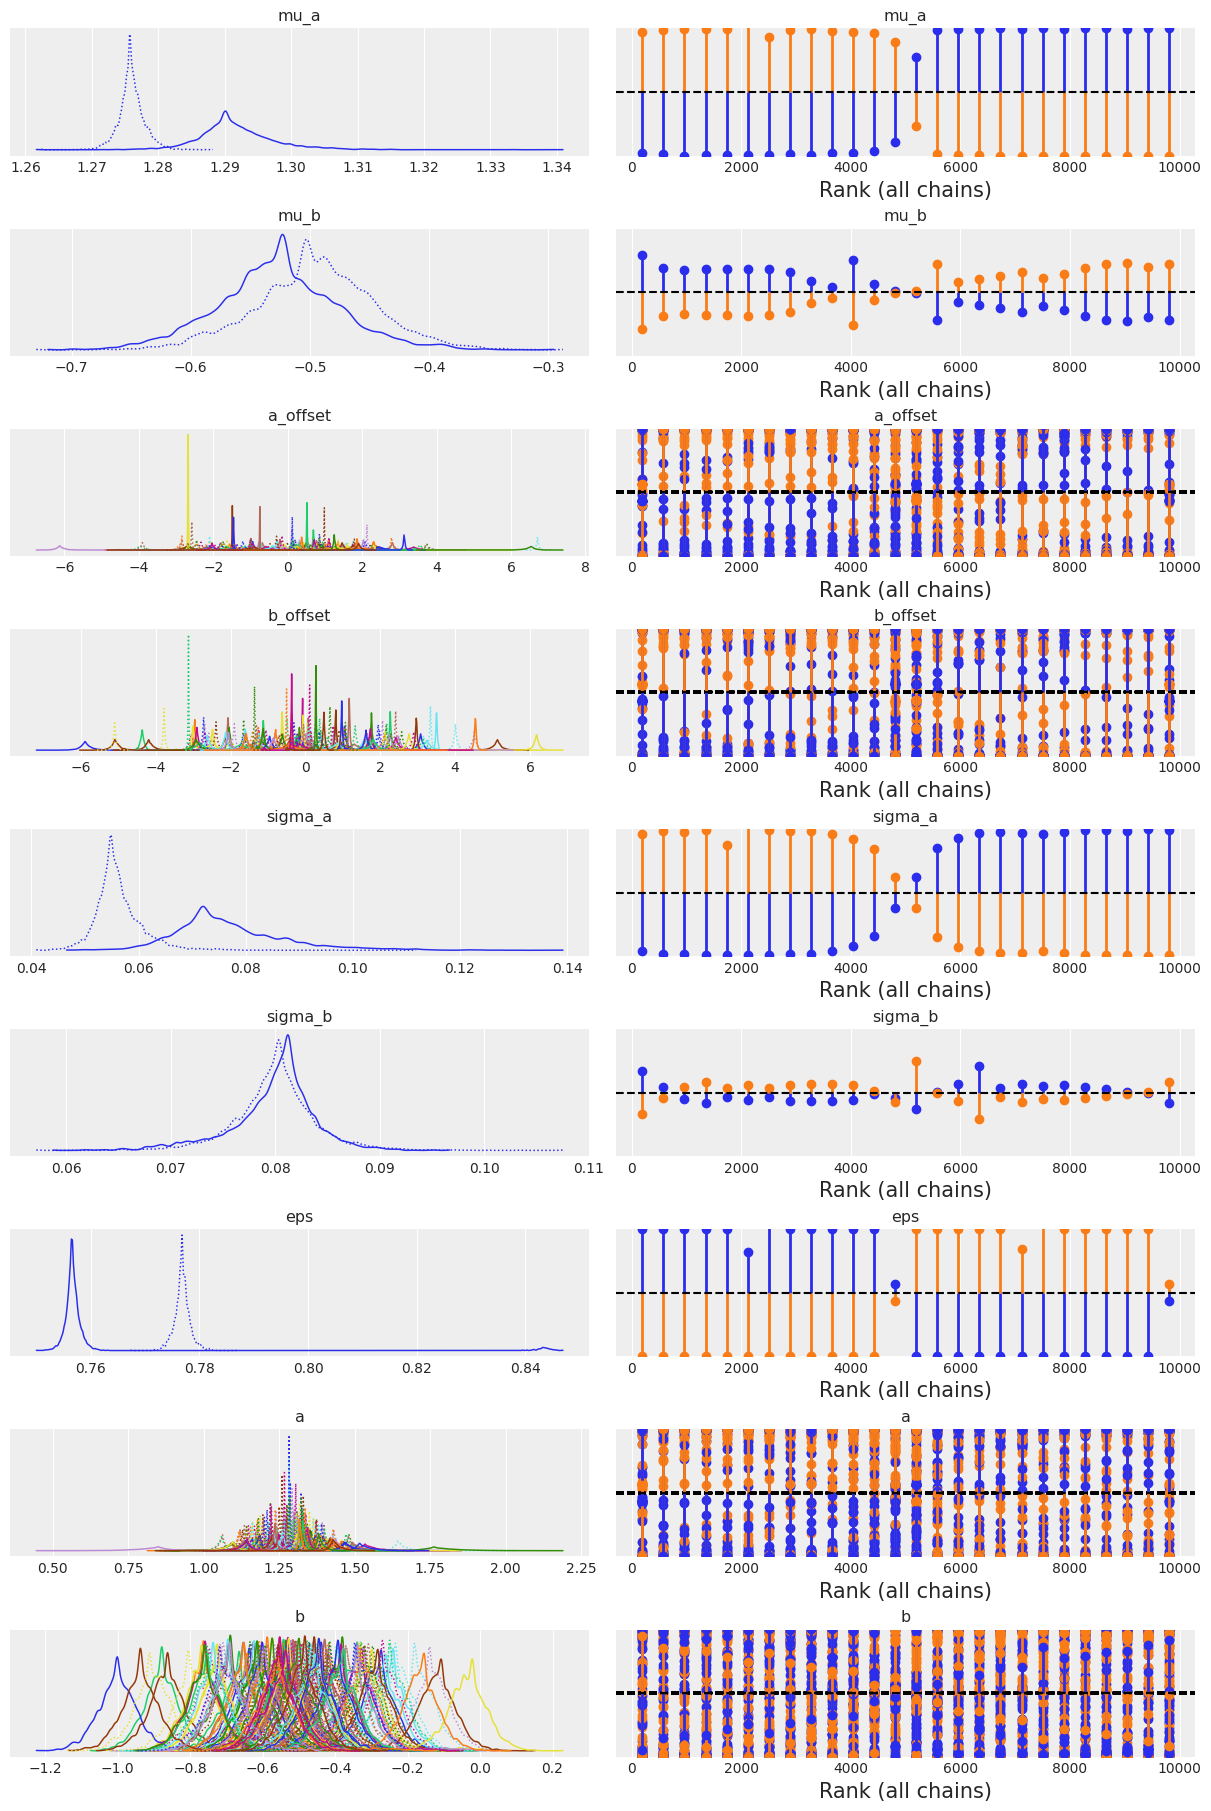

In [43]:
    az.plot_trace(idata_smc_hmc_hierarchical, compact=True, kind="rank_vlines")

In [44]:
with hierarchical_model_non_centered:
    idata_smc_hmc_hierarchical_7 = pm.sample_smc(10, kernel=pm.smc.HMC,
                                       n_steps=2,
                                       path_length=5000,
                                       max_steps=2,
                                       cores=1,
                                       progressbar=True)

Initializing SMC sampler...
Sampling 2 chains in 1 job


TypeError: __init__() missing 1 required positional argument: 'vars'